In [111]:
# import
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud
import re

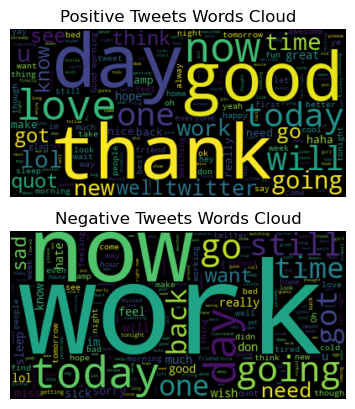

In [123]:
# filter func
def filter_data(data):
    # mention
    data = re.sub(r'@\w+', '', data)
    # link
    data = re.sub(r'http\S+', '', data)
    # symbols
    data = re.sub(r'[-.,?!@#$%^&*]', '', data)
    # under '
    data = re.sub(r'(\'\S+)', '', data)

    data = ' '.join(word for word in data.split())
    return data

# df to wordcloud
def get_wordcloud(words_df):
    words_df_filtered = words_df.apply(filter_data)
    words_list = words_df_filtered.to_list()
    wc = wordcloud.WordCloud(max_words=200, collocations=True)
    wc.generate_from_text(' '.join(words_list))
    return wc

# 데이터셋 불러오기
path = 'data/dataset.csv'
columns = ['sentiment', 'id', 'date', 'flag', 'user', 'text']
sampling_size = 10000
df = pd.read_csv(path,  header=None, names=columns, encoding='latin1')
positive_df = df[df['sentiment'] == 4].text.head(sampling_size)
negative_df = df[df['sentiment'] == 0].text.head(sampling_size)

positive_wc = get_wordcloud(positive_df)
negative_wc = get_wordcloud(negative_df)

# plot
plt.subplot(211)
plt.imshow(positive_wc, interpolation='bilinear')
plt.title('Positive Tweets Words Cloud')
plt.axis('off')

plt.subplot(212)
plt.title('Negative Tweets Words Cloud')
plt.imshow(negative_wc, interpolation = 'bilinear')
plt.axis('off')

plt.show()